<a href="https://colab.research.google.com/github/vru-1108/Data-science-projects/blob/main/Predicting_Income_level_based_on_US_census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as iplot

In [ ]:
#installing dexplot
! pip install dexplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv("/content/adult.csv")
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [ ]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
df.drop([' 2174',' 0',' 40'], axis= 'columns', inplace= True)
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   United-States   <=50K  
0     Exec-managerial         Husband   White     Male   United-States   <=50K  
1   Handlers-cleaners   Not-in-family   White     Male   United-States   <=50K  
2   Handlers-cleaners         Husband   Black     Male   United-States   <=50K  
3      Prof-specialty            Wife   Black   Female            Cuba   <=50K  
4     Exec-managerial            Wife   White   Female   United-States   <=50K

In [ ]:
df.columns = ['Age', 'Type_of_Owner', 'id', 'Education', 'No_of_Projects_Done', 'Marital_Status', 'Job_Designation', 'Family_Relation', 'Race', 'Gender', 'Country', 'Salary']

In [ ]:
df.head()

Age      Type_of_Owner      id   Education  No_of_Projects_Done  \
0   50   Self-emp-not-inc   83311   Bachelors                   13   
1   38            Private  215646     HS-grad                    9   
2   53            Private  234721        11th                    7   
3   28            Private  338409   Bachelors                   13   
4   37            Private  284582     Masters                   14   

        Marital_Status     Job_Designation Family_Relation    Race   Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

          Country  Salary  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [ ]:
df.shape

(32560, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  32560 non-null  int64 
 1   Type_of_Owner        32560 non-null  object
 2   id                   32560 non-null  int64 
 3   Education            32560 non-null  object
 4   No_of_Projects_Done  32560 non-null  int64 
 5   Marital_Status       32560 non-null  object
 6   Job_Designation      32560 non-null  object
 7   Family_Relation      32560 non-null  object
 8   Race                 32560 non-null  object
 9   Gender               32560 non-null  object
 10  Country              32560 non-null  object
 11  Salary               32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
df.describe()

Age            id  No_of_Projects_Done
count  32560.000000  3.256000e+04         32560.000000
mean      38.581634  1.897818e+05            10.080590
std       13.640642  1.055498e+05             2.572709
min       17.000000  1.228500e+04             1.000000
25%       28.000000  1.178315e+05             9.000000
50%       37.000000  1.783630e+05            10.000000
75%       48.000000  2.370545e+05            12.000000
max       90.000000  1.484705e+06            16.000000

In [ ]:
df.isnull().sum()

Age                    0
Type_of_Owner          0
id                     0
Education              0
No_of_Projects_Done    0
Marital_Status         0
Job_Designation        0
Family_Relation        0
Race                   0
Gender                 0
Country                0
Salary                 0
dtype: int64

Data visualization


In [ ]:
labels = df['Type_of_Owner'].value_counts().index
values = df['Type_of_Owner'].value_counts().values

colors = df['Type_of_Owner']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Type of Age Dataset

labels = df['Age'].value_counts()[:10].index
values = df['Age'].value_counts().values

colors = df['Age']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Highest Degree of Eduaction

labels = df['Education'].value_counts().index
values = df['Education'].value_counts().values

colors = df['Education']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the No_of_Projects_Done

labels = df['No_of_Projects_Done'].value_counts().index
values = df['No_of_Projects_Done'].value_counts().values

colors = df['No_of_Projects_Done']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Marital Status of the Working Class People

labels = df['Marital_Status'].value_counts().index
values = df['Marital_Status'].value_counts().values

colors = df['Marital_Status']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Job Descriptions of the Working Class People

labels = df['Job_Designation'].value_counts().index
values = df['Job_Designation'].value_counts().values

colors = df['Job_Designation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Family-Relation of the Working Class People

labels = df['Family_Relation'].value_counts().index
values = df['Family_Relation'].value_counts().values

colors = df['Family_Relation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
labels = df['Race'].value_counts().index
values = df['Race'].value_counts().values

colors = ['#98adbf',
 '#1d4466',
 '#2678bf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Gender of the Working Class People

labels = df['Gender'].value_counts().index
values = df['Gender'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Country of the Working Class People

labels = df['Country'].value_counts().index
values = df['Country'].value_counts().values

colors = df['Country']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

In [ ]:
# Visualizing the Salary of the Working Class People

labels = df['Salary'].value_counts().index
values = df['Salary'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])
fig.show()

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



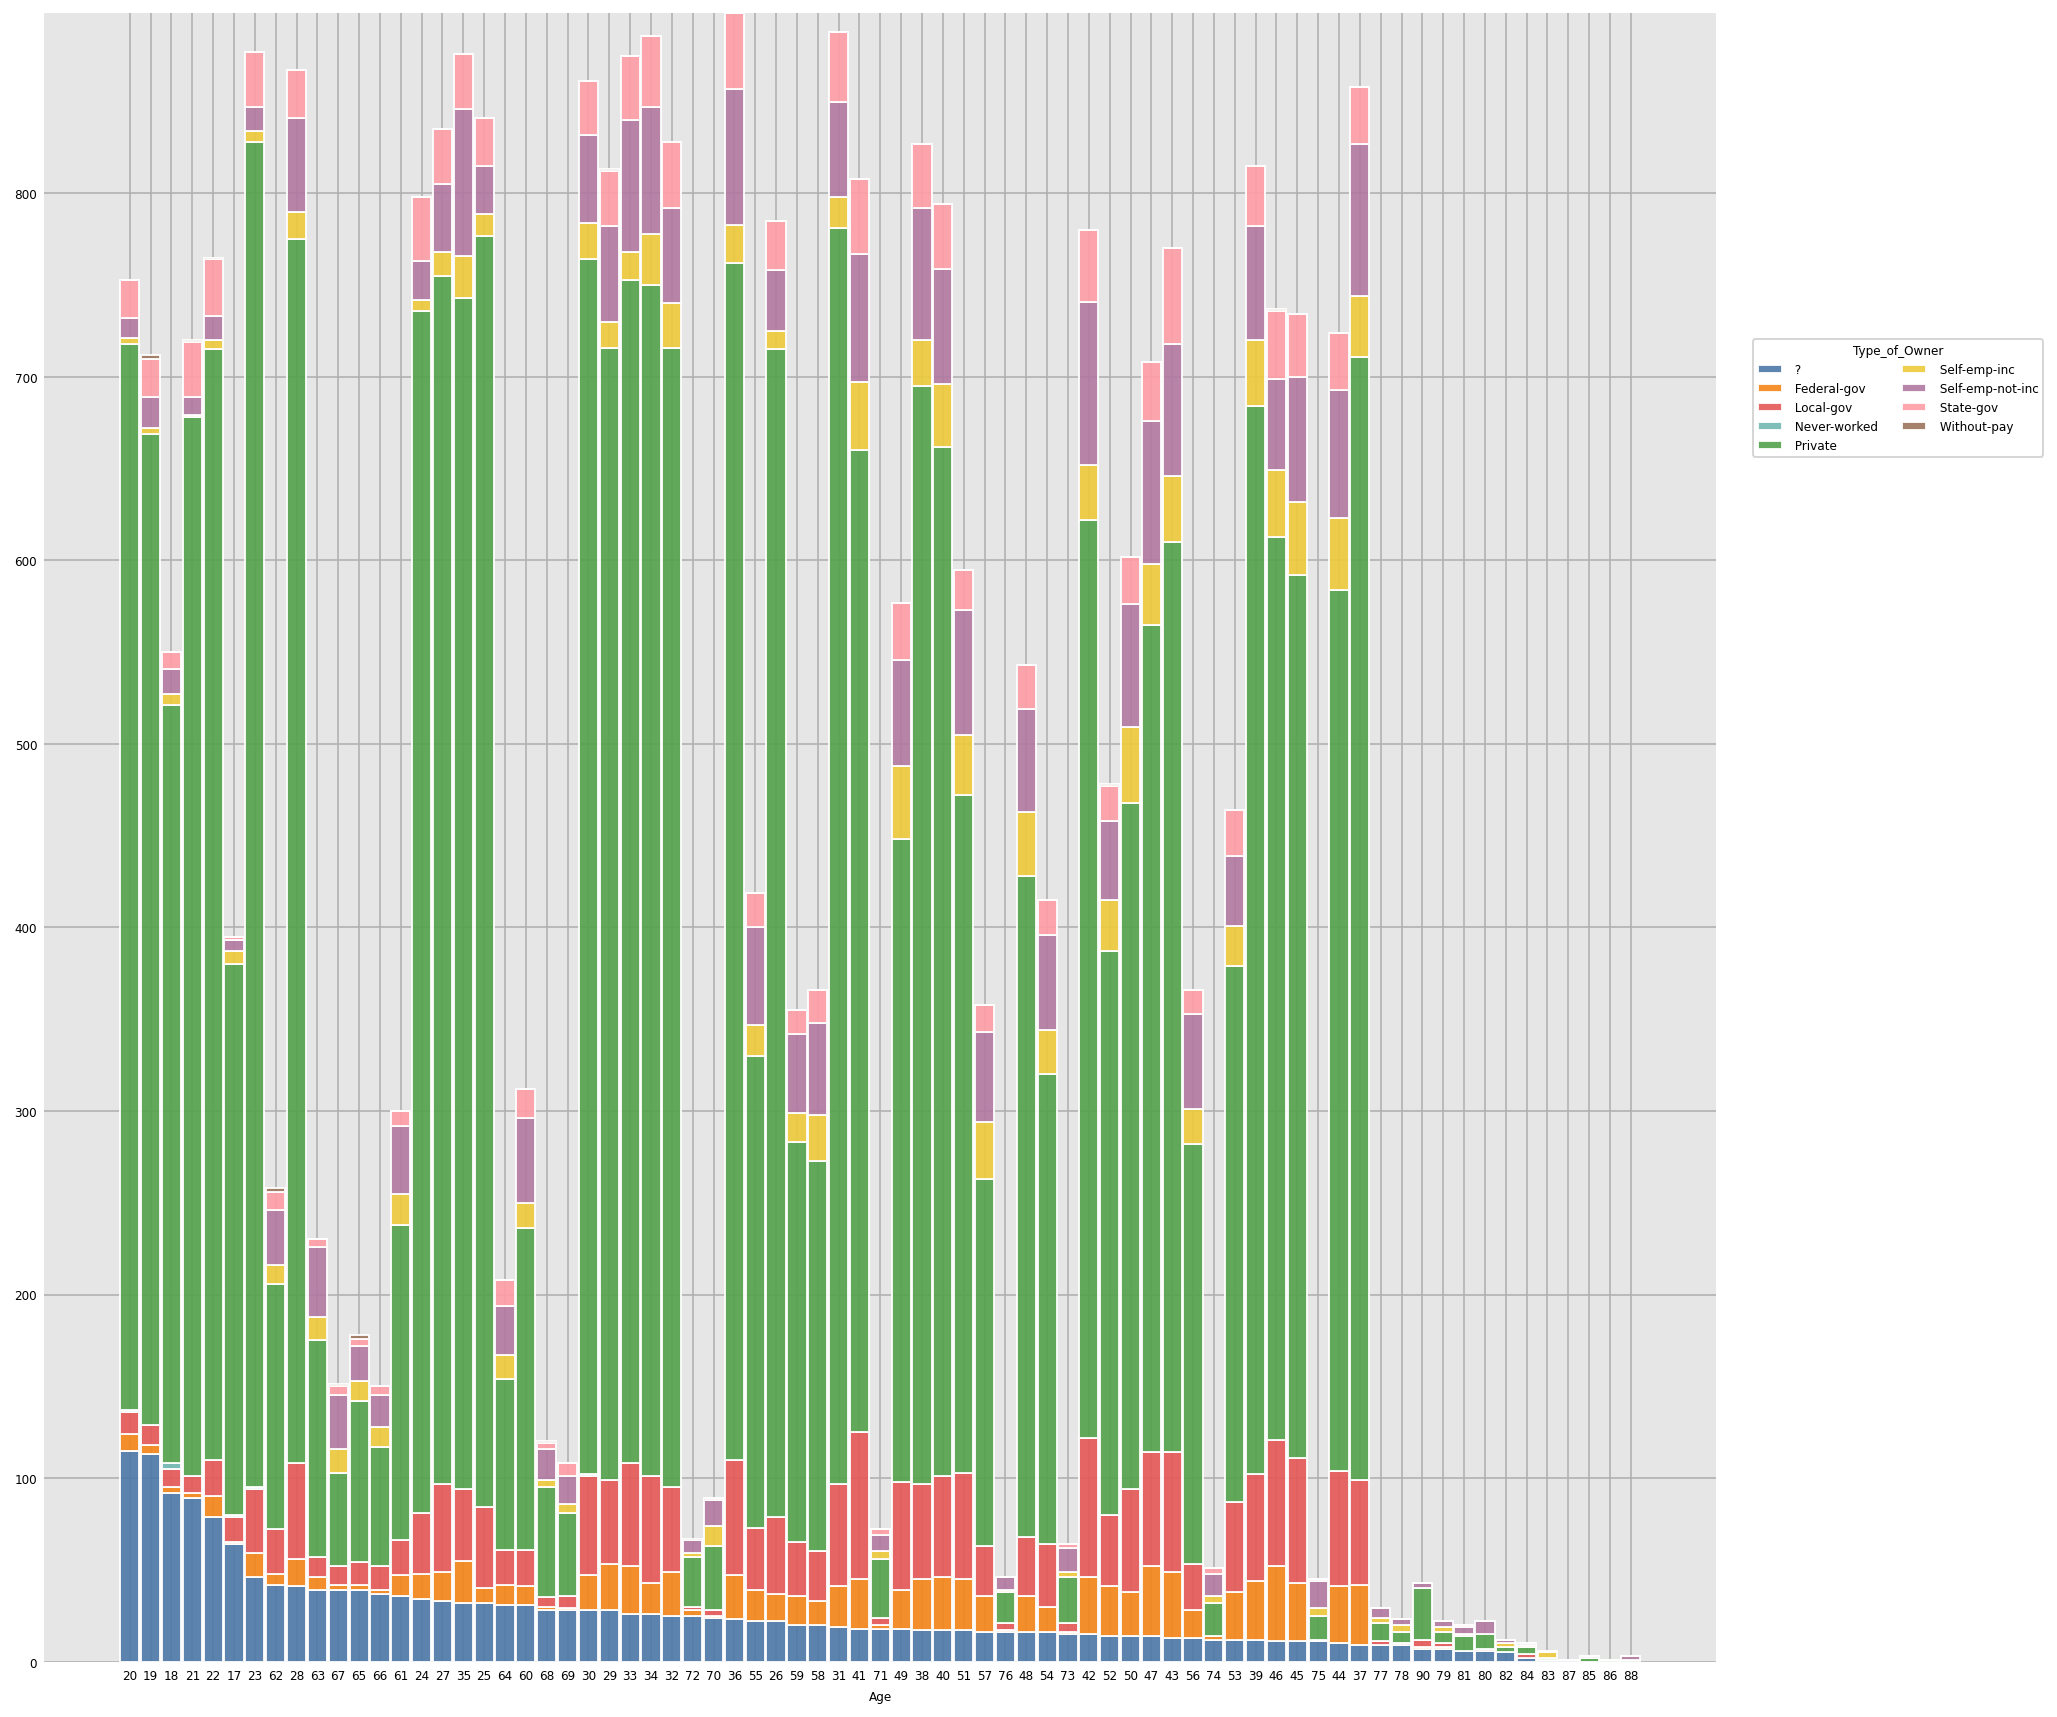

In [ ]:
# Importing the Dexplot

import dexplot as dxp

dxp.count(
    val="Age",
    data = df,
    split="Type_of_Owner",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



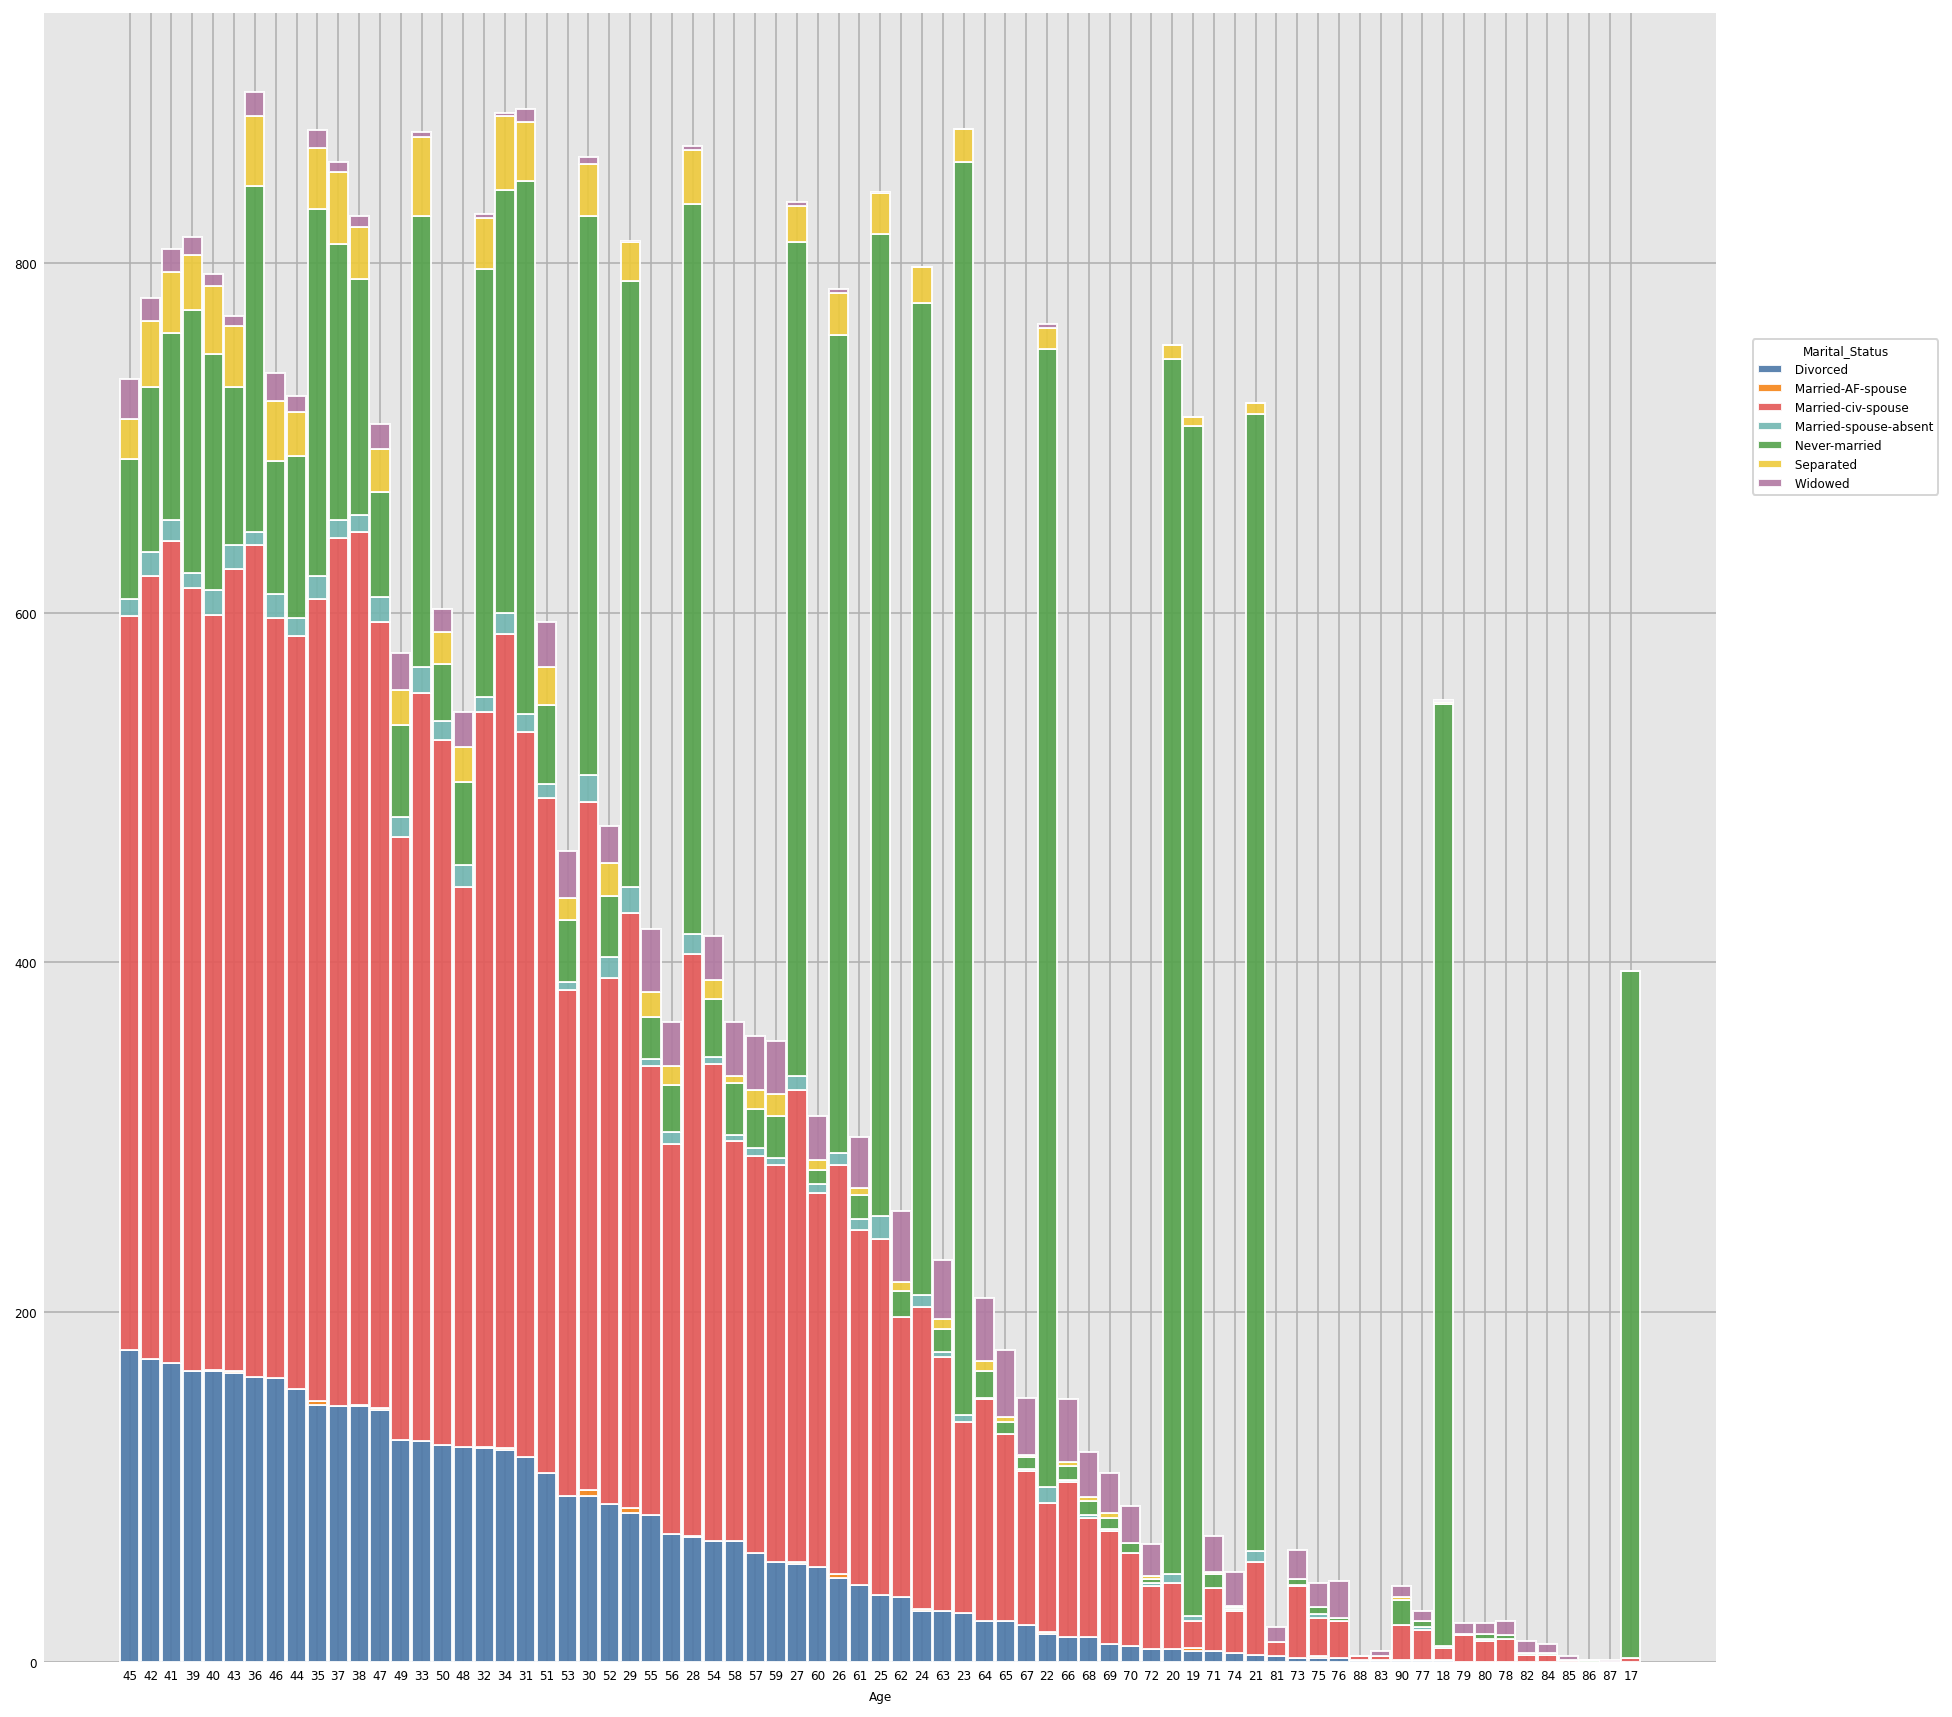

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Marital_Status",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



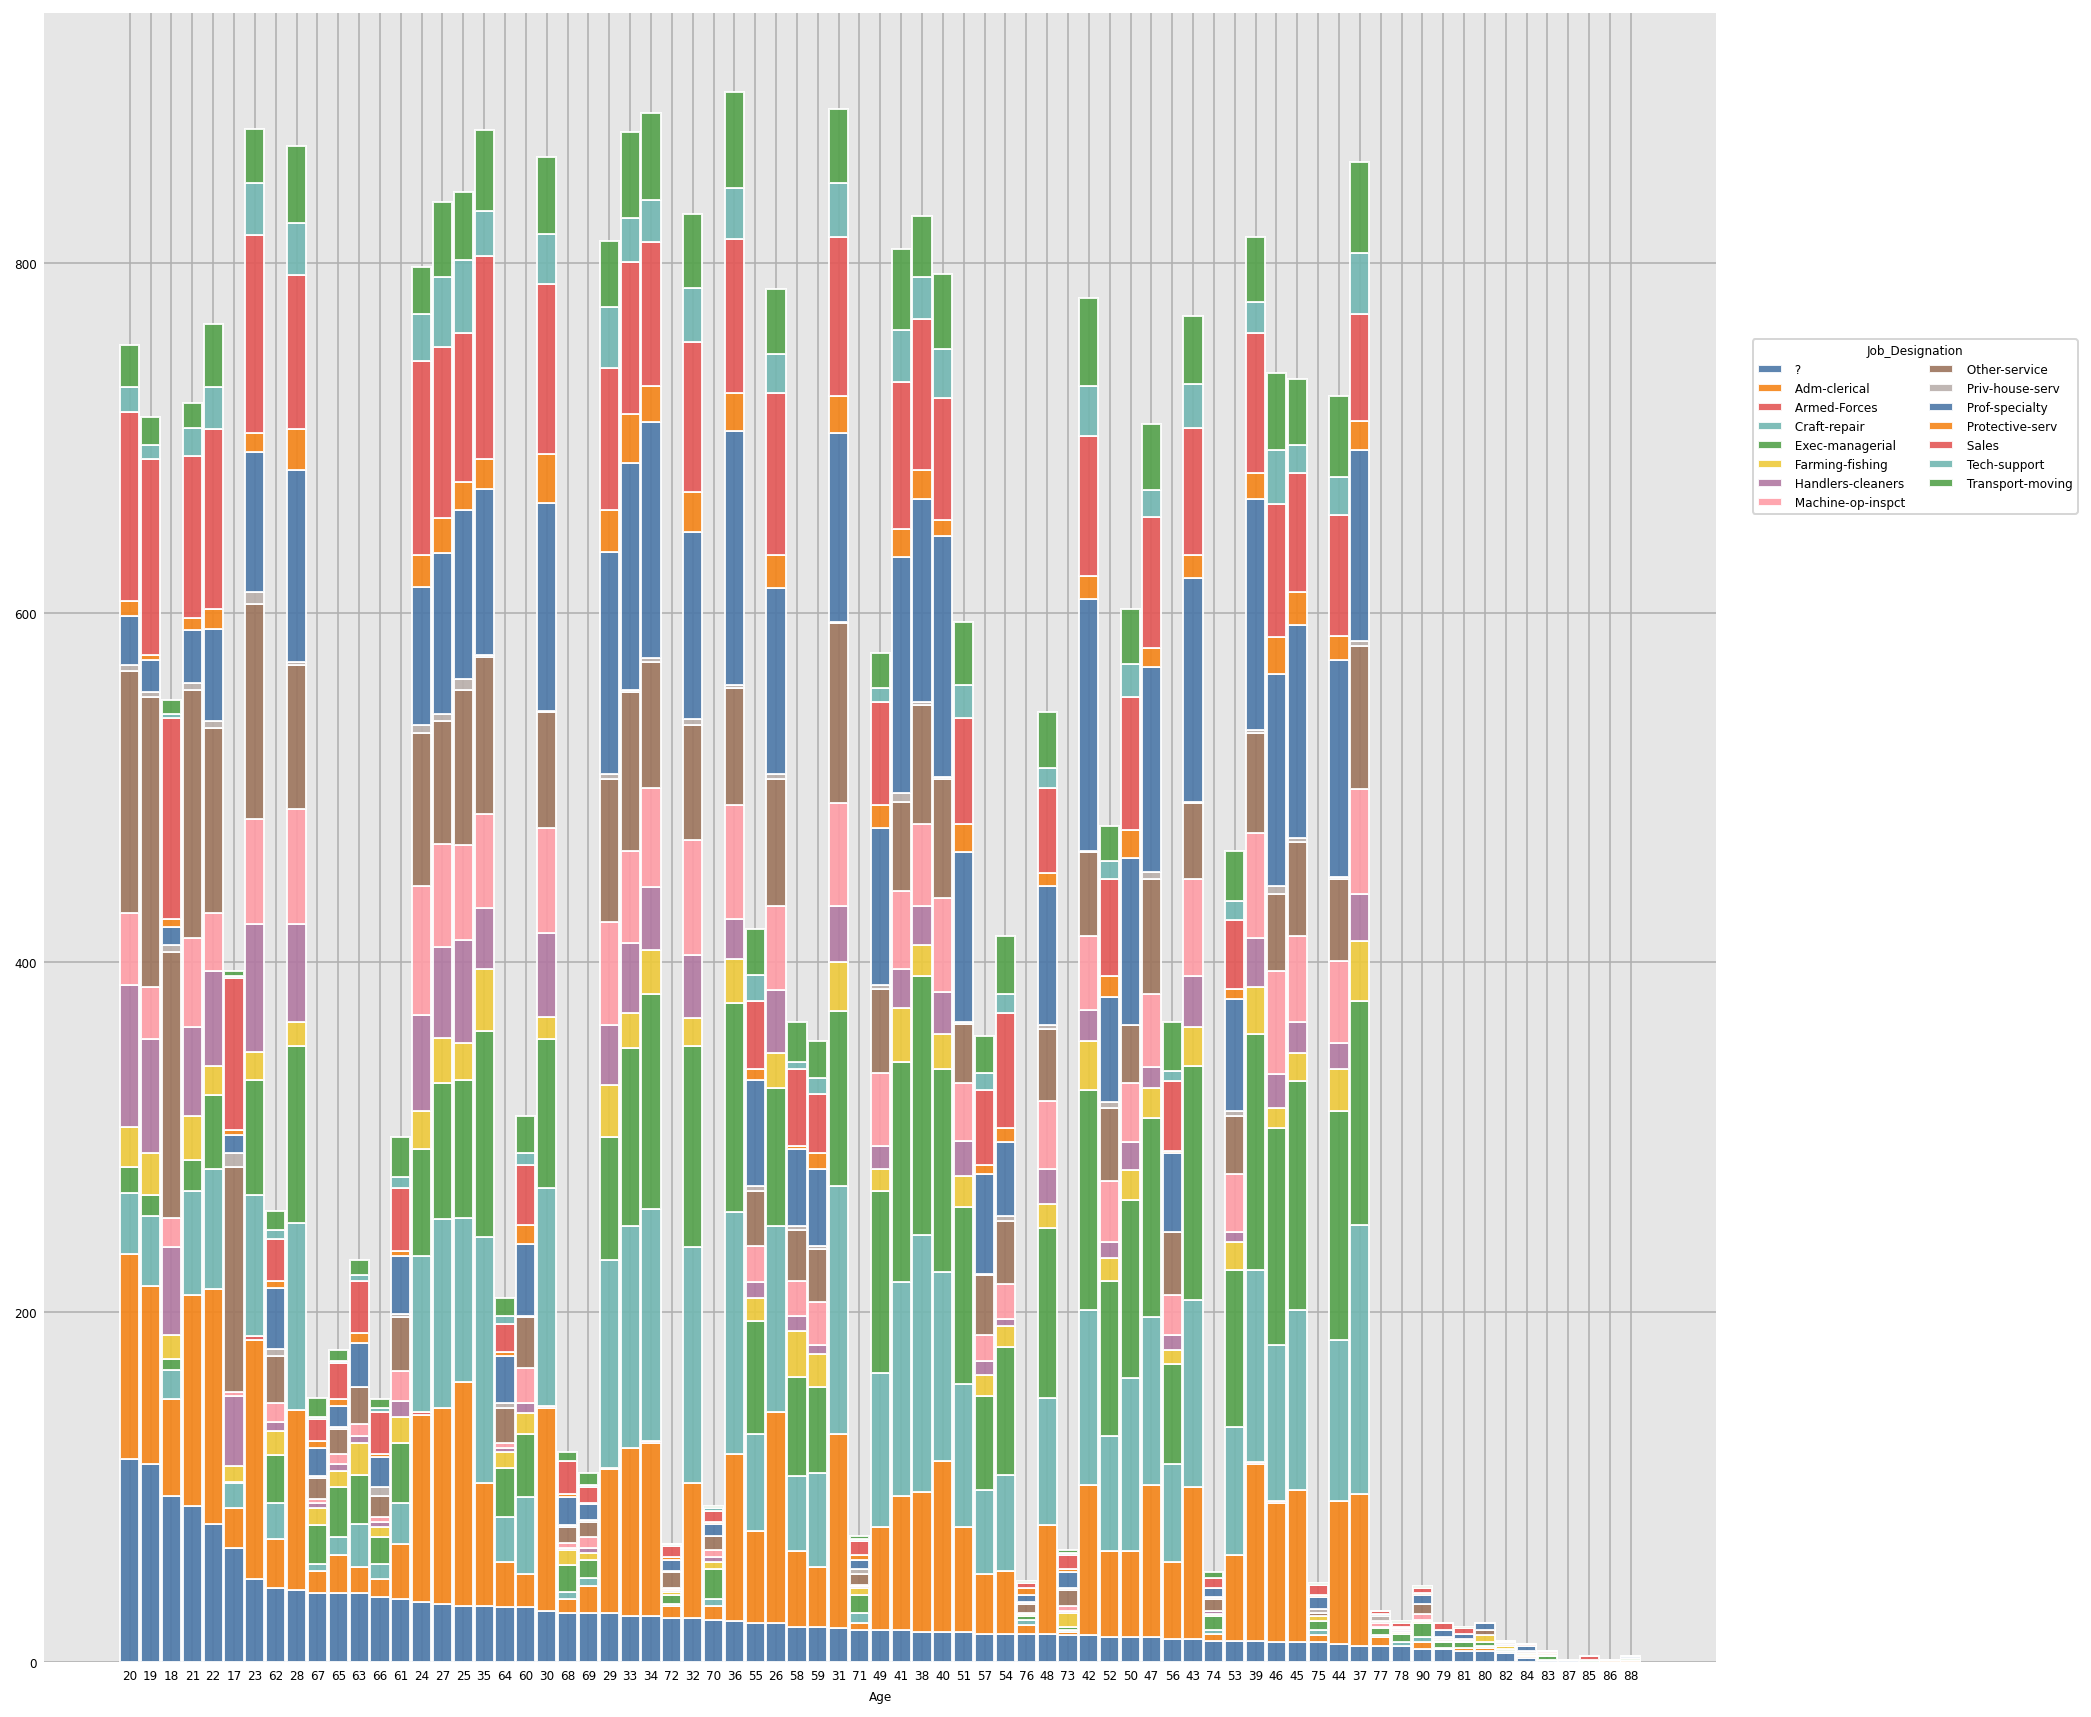

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Job_Designation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



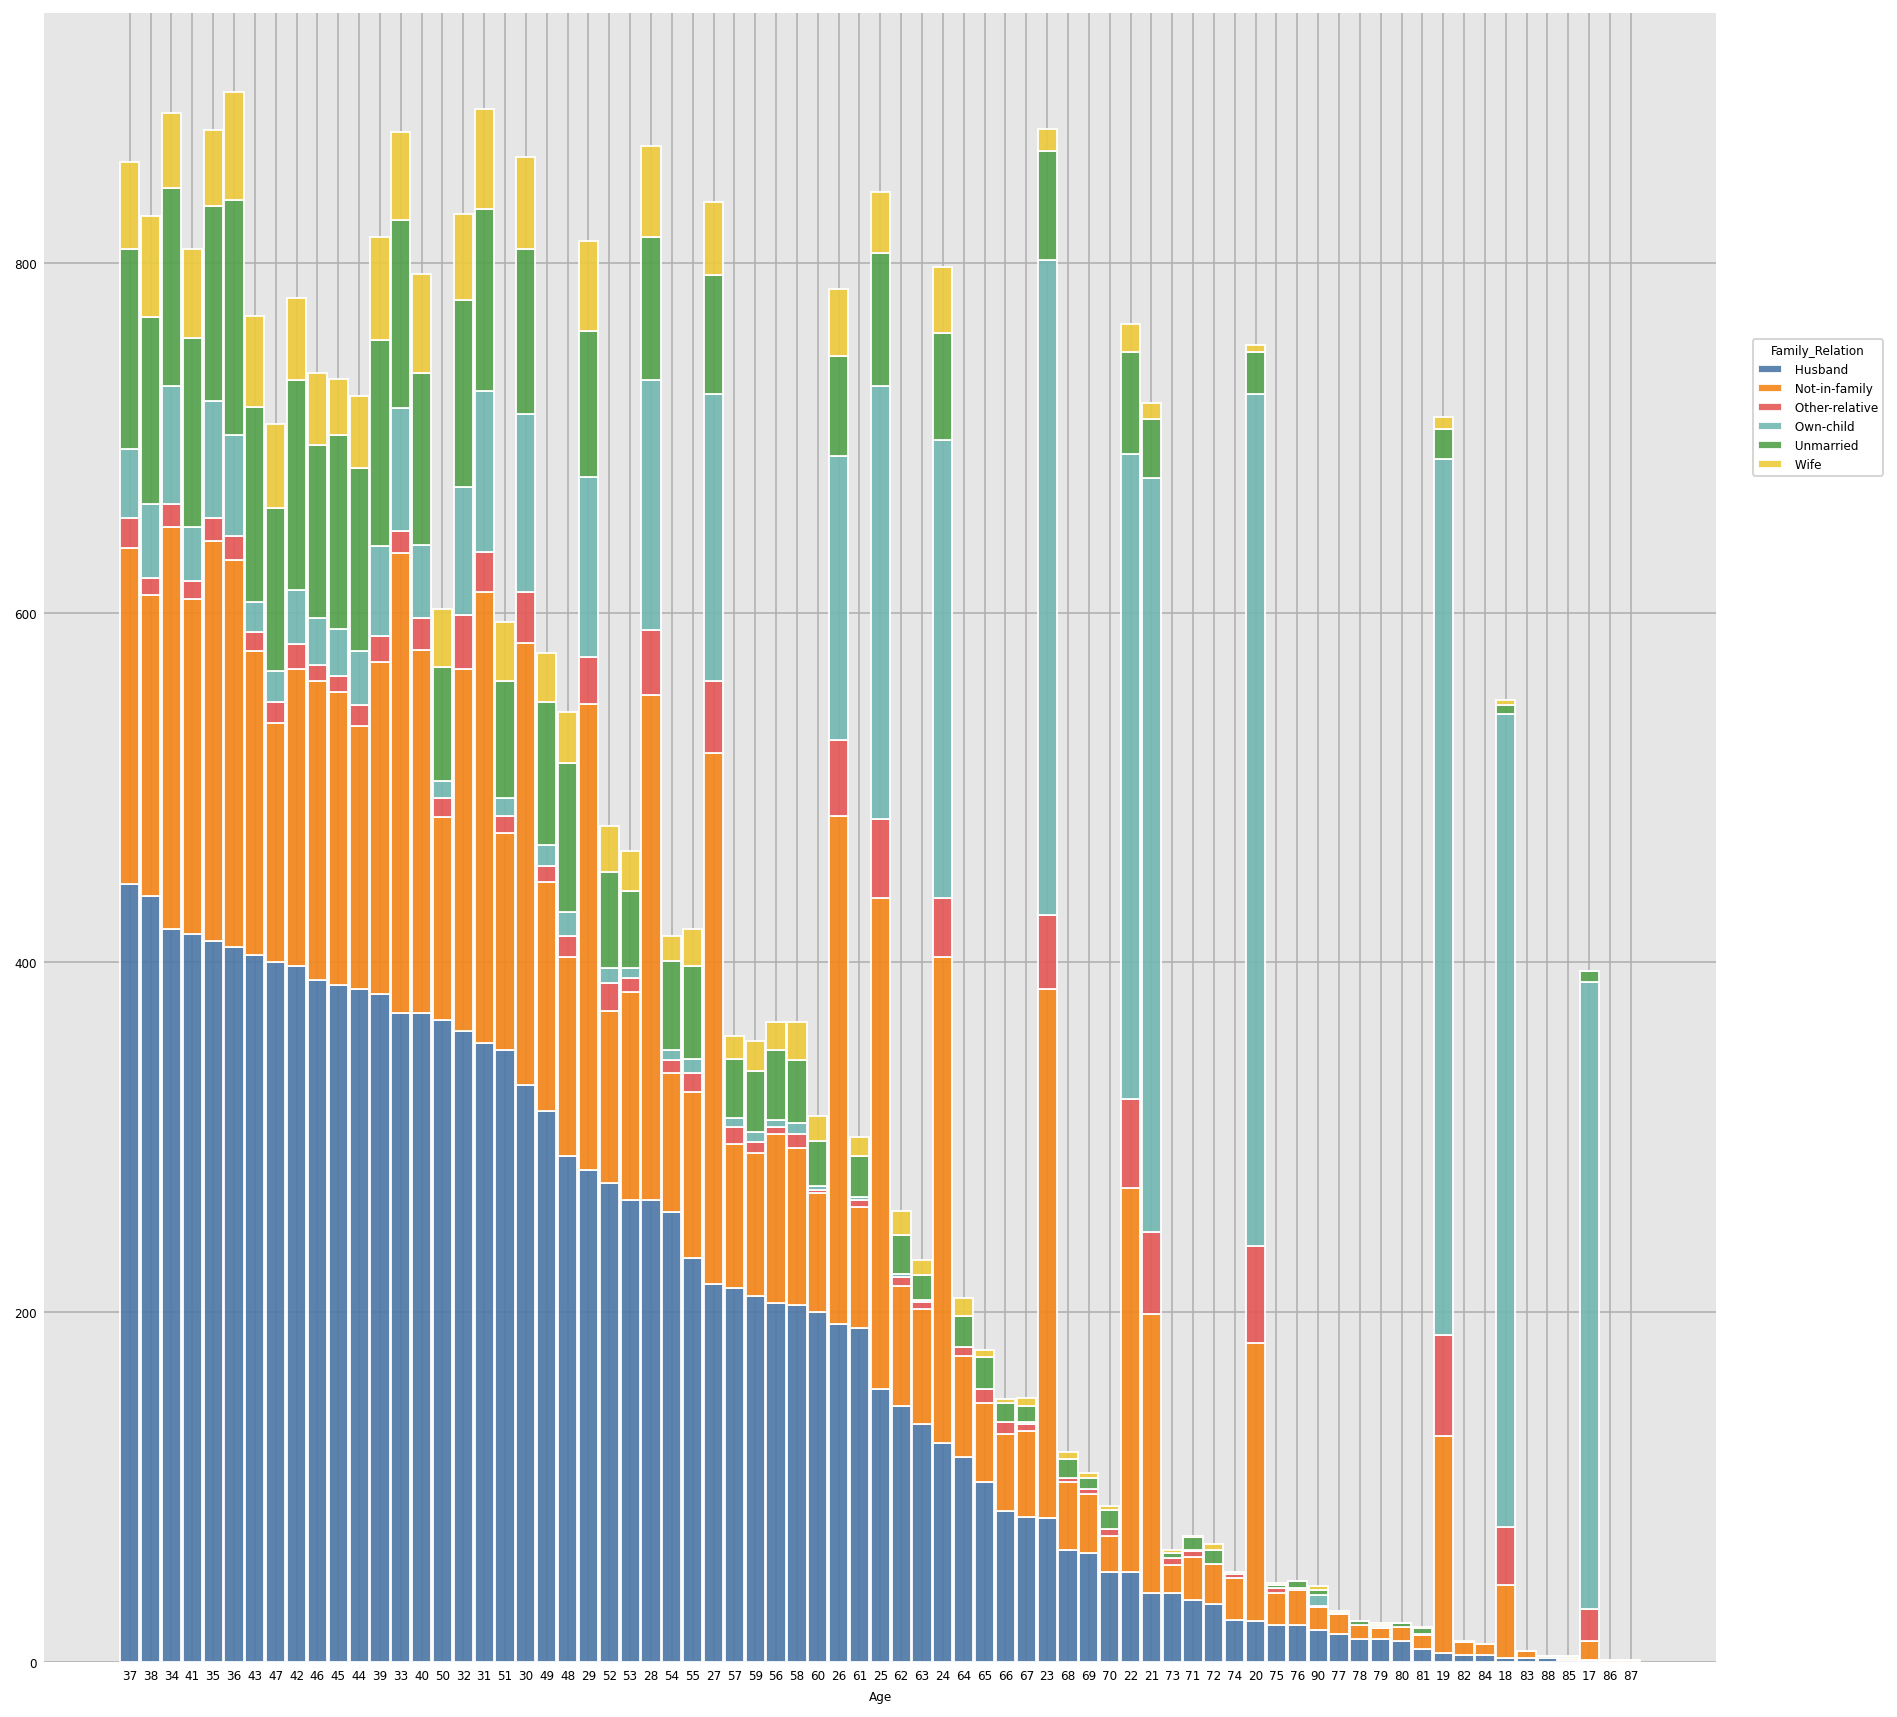

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Family_Relation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")



/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



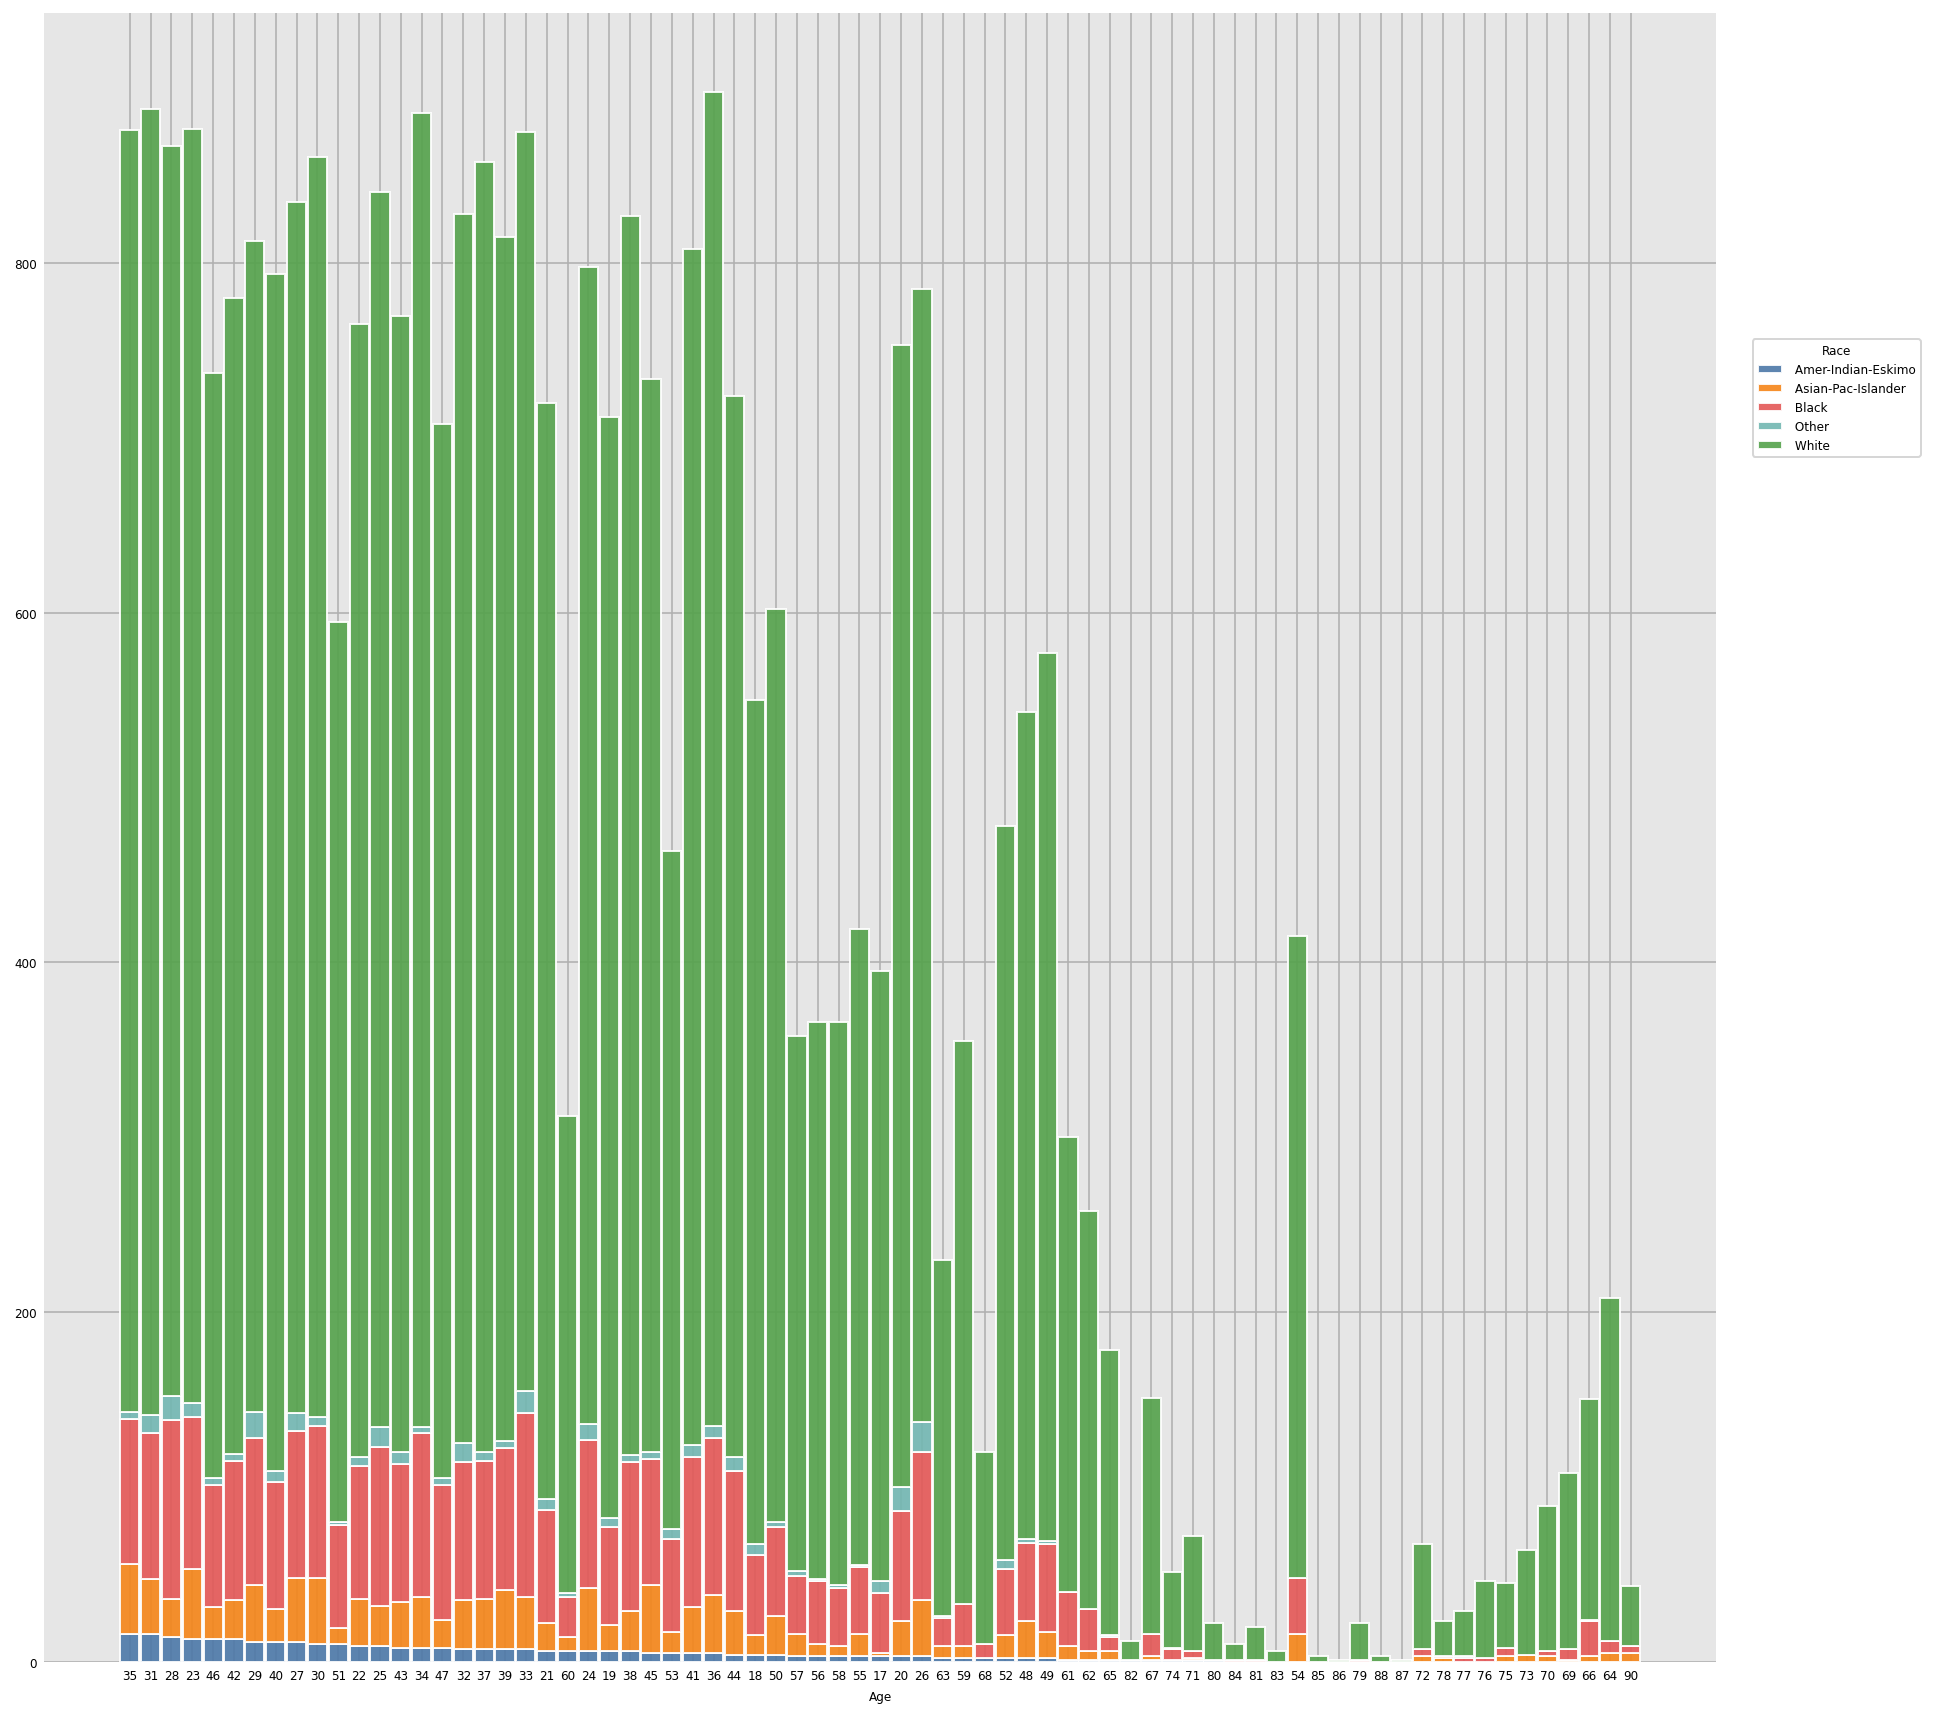

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Race",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



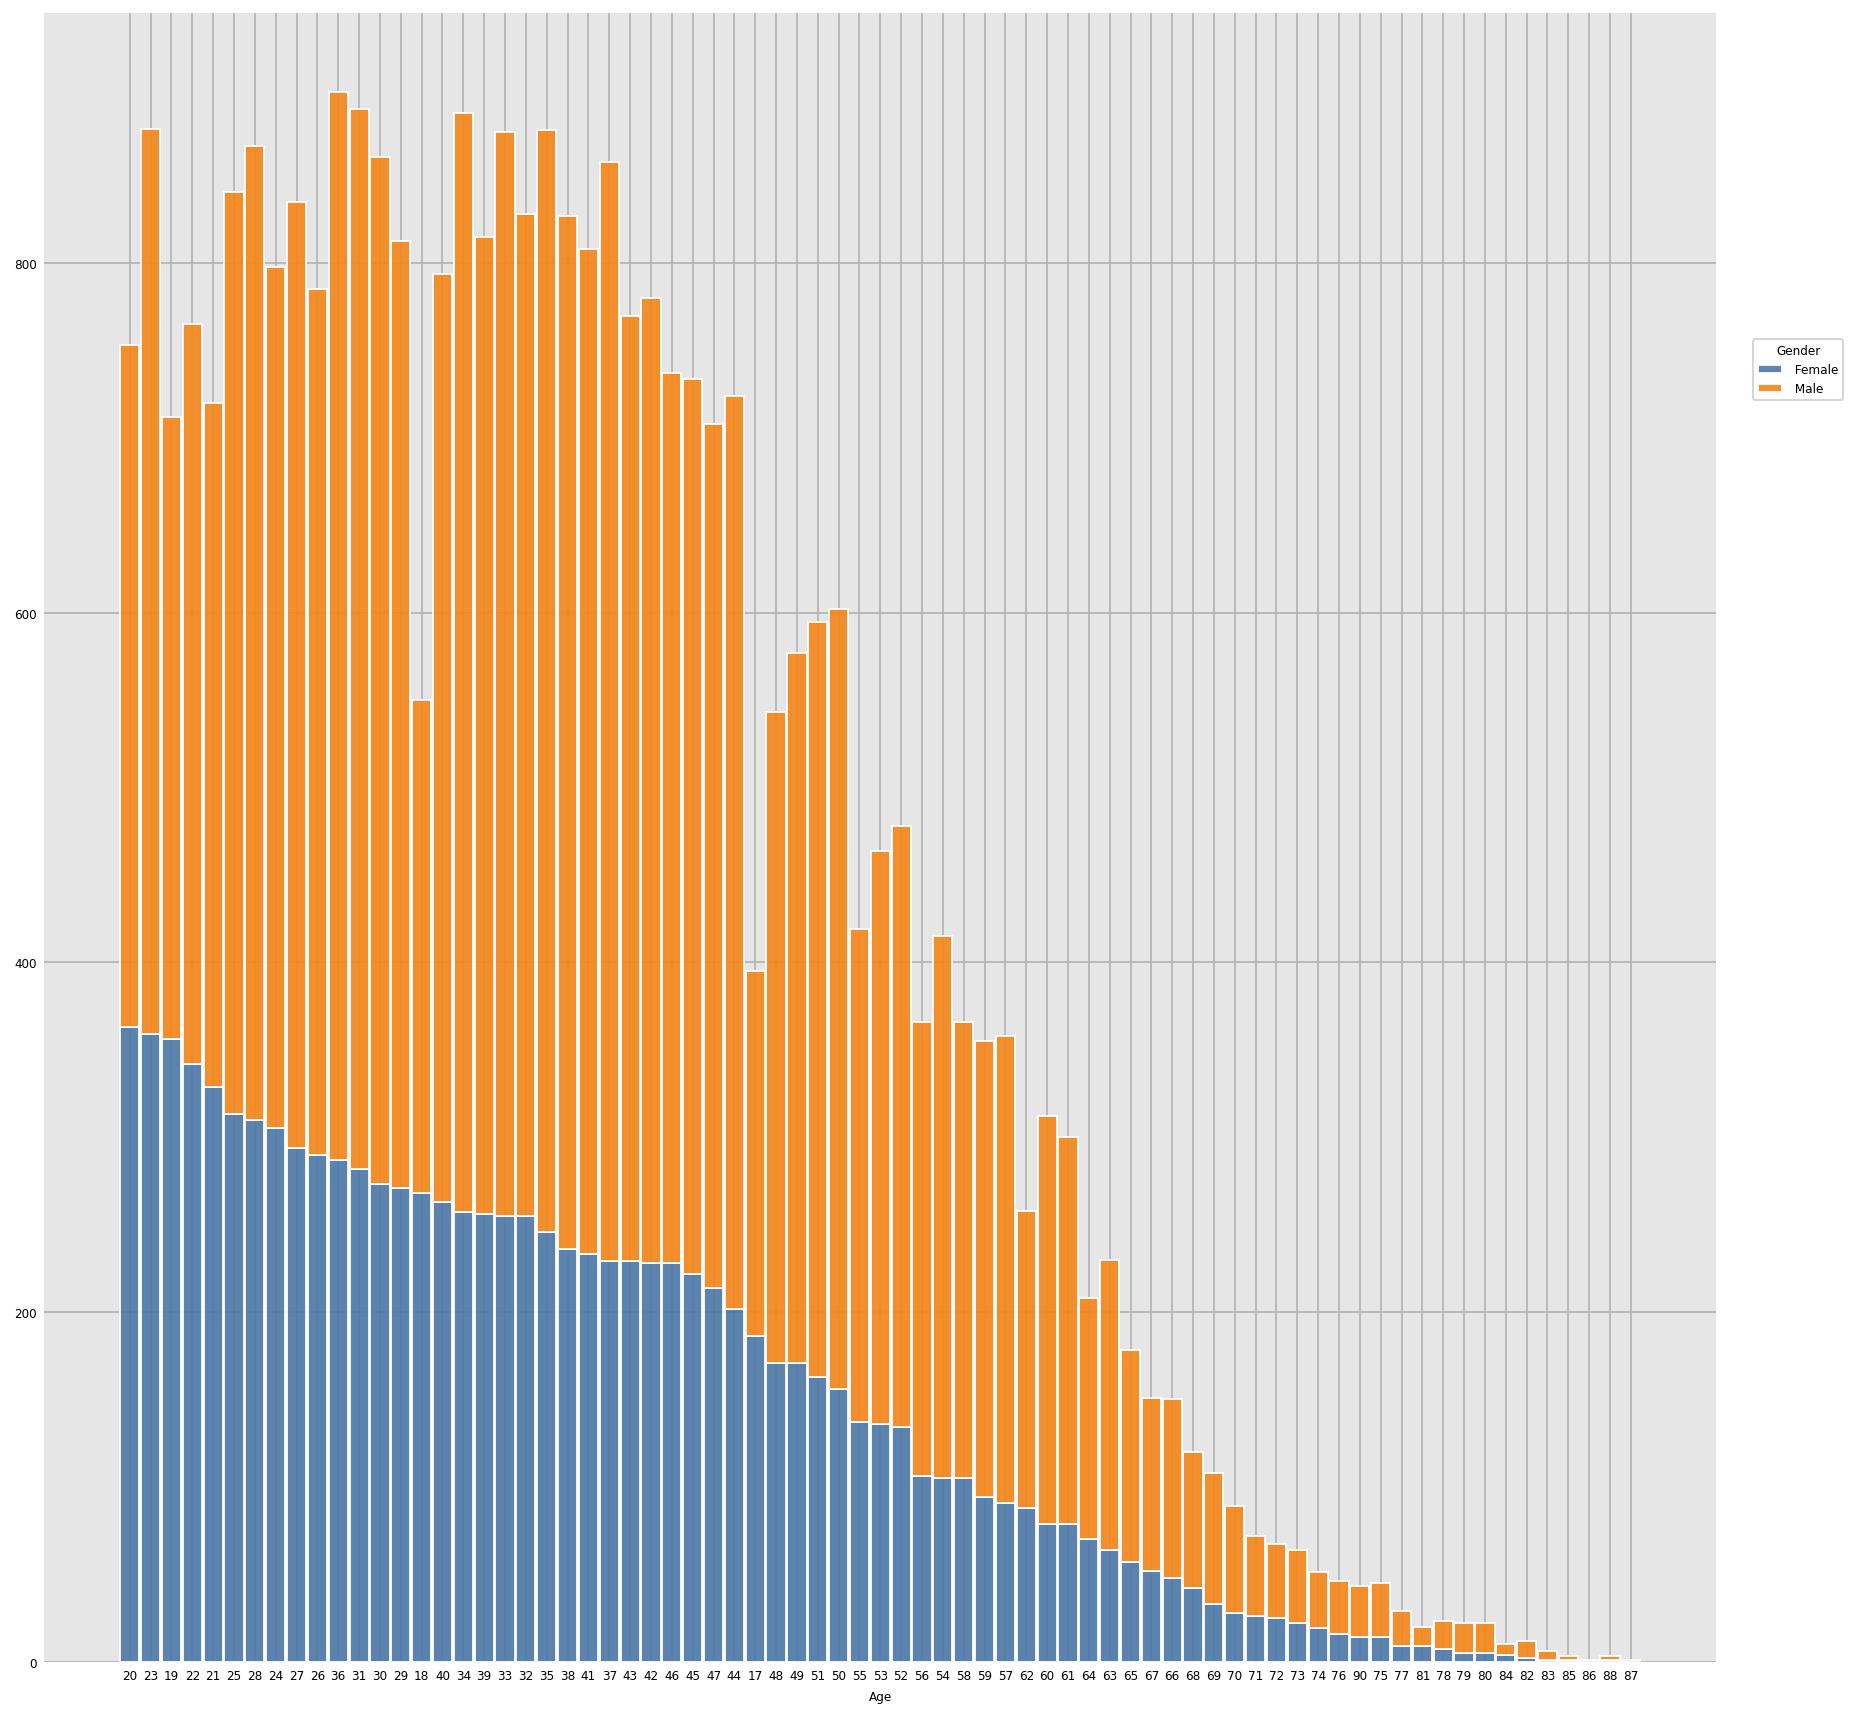

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Gender",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

/usr/local/lib/python3.10/dist-packages/dexplot/_common_plot.py:156: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



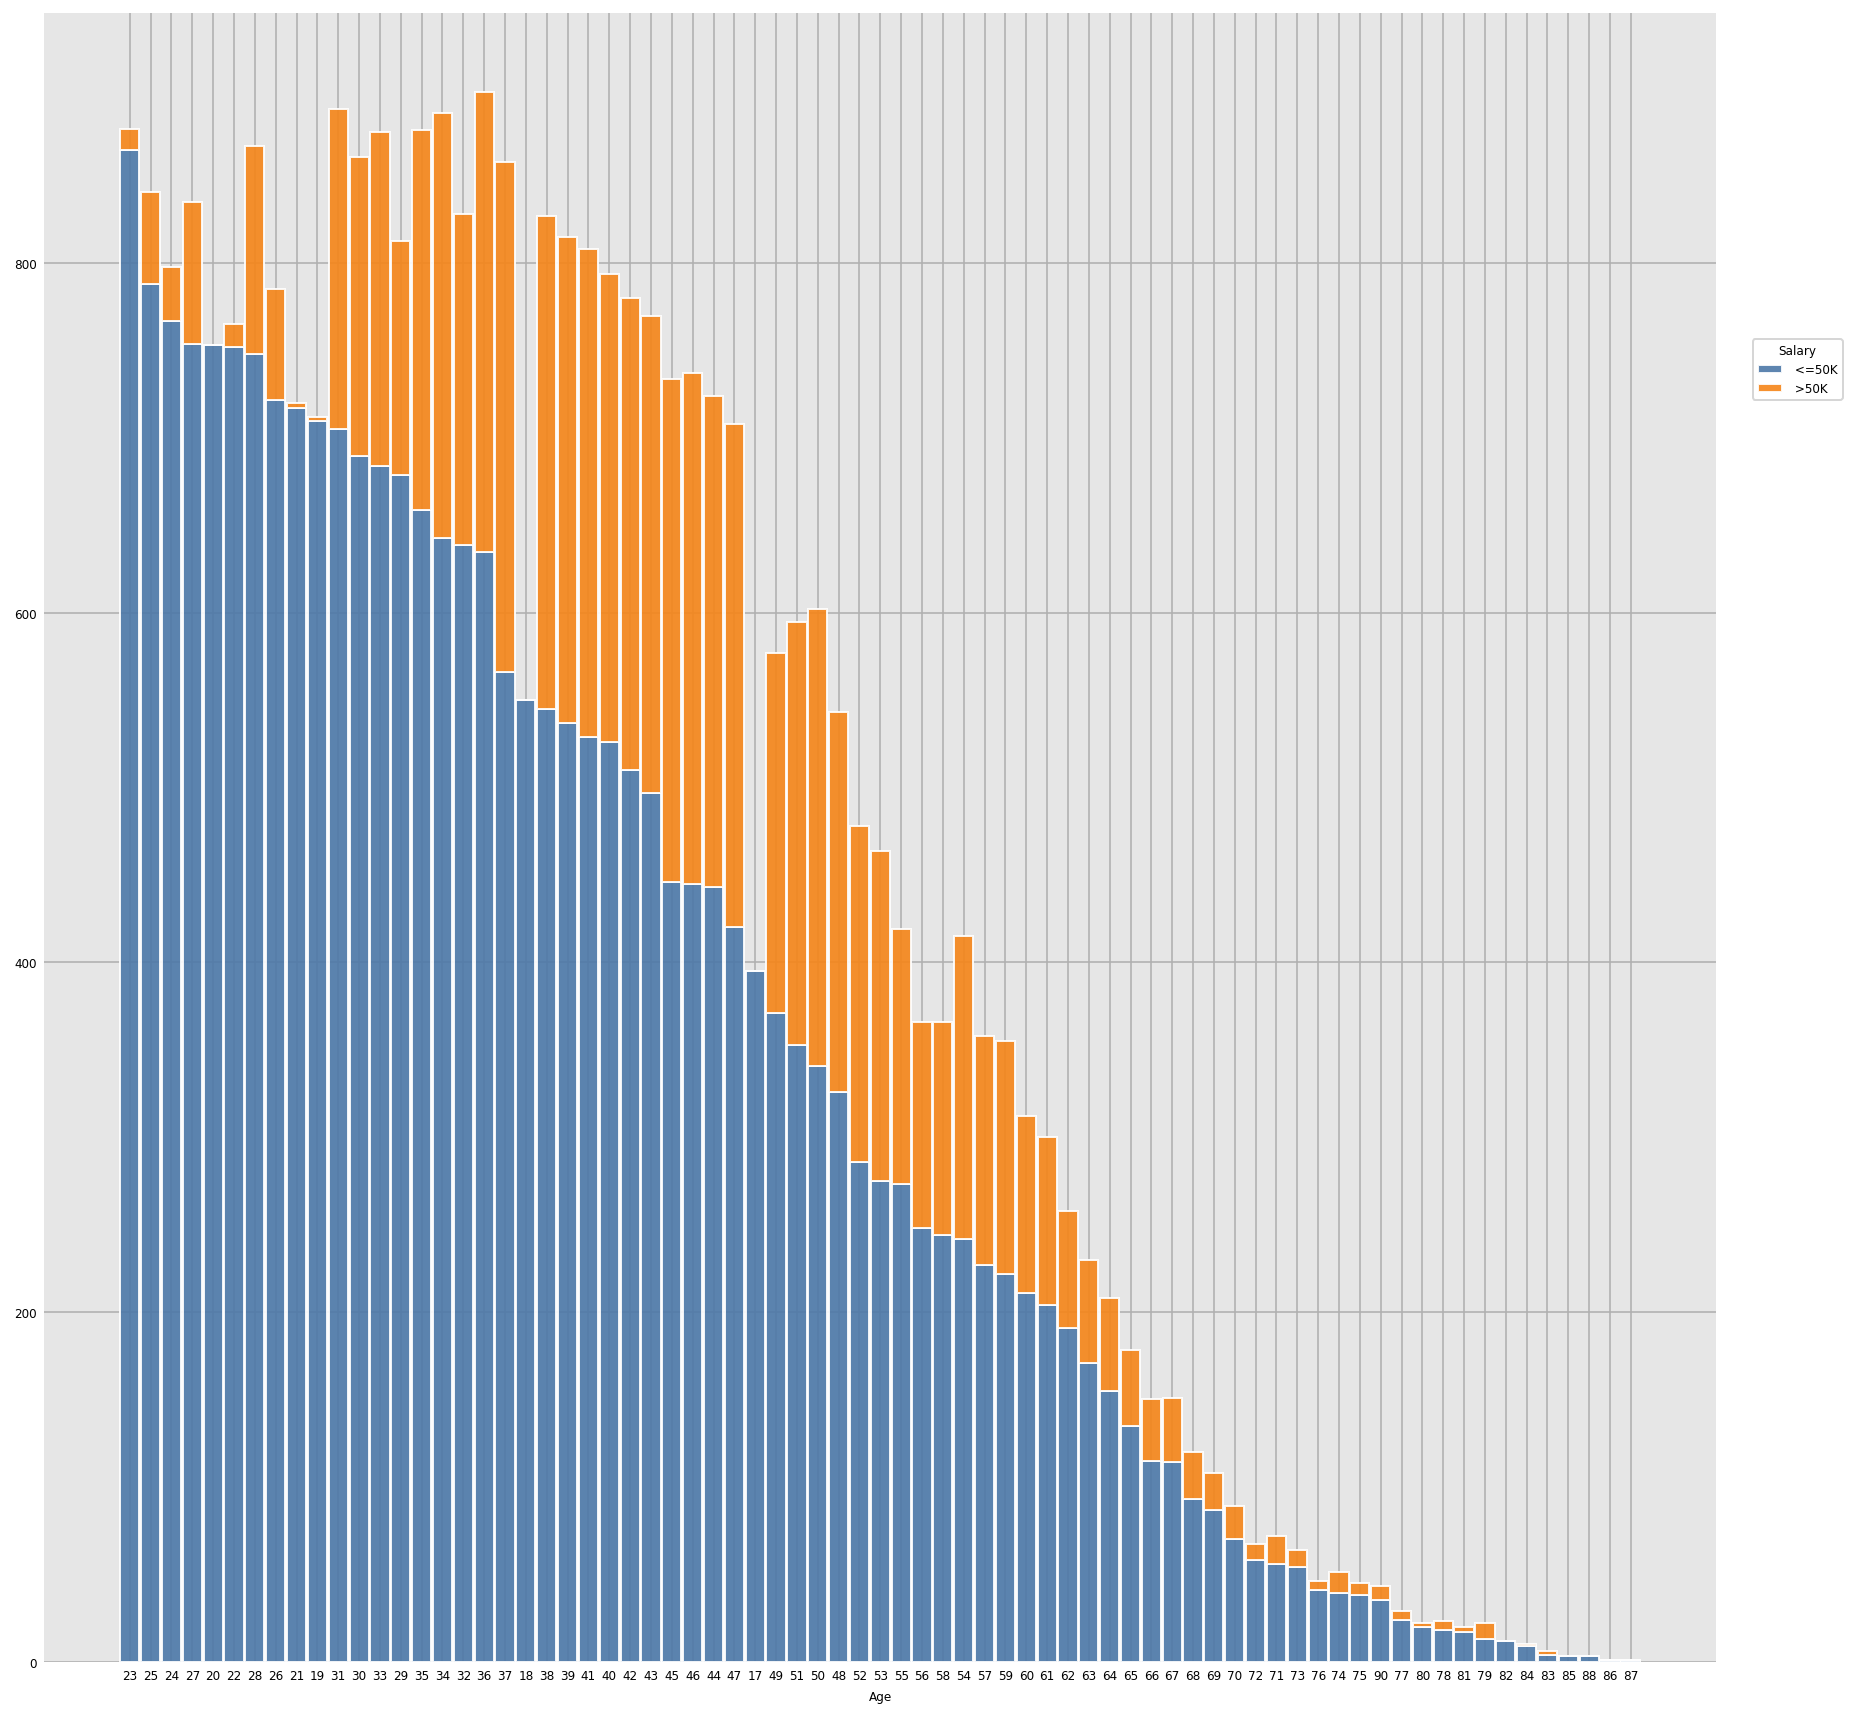

In [ ]:
dxp.count(
    val="Age",
    data = df,
    split="Salary",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

In [ ]:
X = df.drop(['Age', 'id', 'Salary', 'Country', 'Family_Relation'], axis = 1)
y = df['Salary']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (26048, 7)
The size of training output is (26048,)
The size of testing input is (6512, 7)
The size of testing output is (6512,)


In [ ]:
# Importing the category Encoders
! pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
X_train.head()

Type_of_Owner      Education  No_of_Projects_Done       Marital_Status  \
24639       Private           12th                    8        Never-married   
5514      State-gov   Some-college                   10        Never-married   
19777       Private   Some-college                   10              Widowed   
10781       Private        HS-grad                    9        Never-married   
32239       Private      Assoc-voc                   11   Married-civ-spouse   

          Job_Designation    Race   Gender  
24639   Machine-op-inspct   White     Male  
5514         Adm-clerical   White   Female  
19777     Exec-managerial   White   Female  
10781        Tech-support   Black     Male  
32239     Farming-fishing   White     Male

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Education', 'Type_of_Owner', 'Gender', 'Job_Designation',
                                   'Marital_Status', 'No_of_Projects_Done', 'Race'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# Now lets see how the Data looks like after doing the one-hot encoding

X_train.head()

Type_of_Owner  Education  No_of_Projects_Done  Marital_Status  \
24639              1          1                    1               1   
5514               2          2                    2               1   
19777              1          2                    2               2   
10781              1          3                    3               1   
32239              1          4                    4               3   

       Job_Designation  Race  Gender  
24639                1     1       1  
5514                 2     1       2  
19777                3     1       2  
10781                4     2       1  
32239                5     1       1

In [ ]:
X_test.head()

Type_of_Owner  Education  No_of_Projects_Done  Marital_Status  \
14160              1          3                    3               4   
27047              2          3                    3               3   
28867              1          5                    5               3   
5667               1         12                   12               1   
7827               1          8                    8               2   

       Job_Designation  Race  Gender  
14160                2     1       2  
27047                3     1       2  
28867                3     2       1  
5667                 6     1       1  
7827                 6     1       2

In [ ]:
y_train.head()


24639     <=50K
5514      <=50K
19777     <=50K
10781     <=50K
32239     <=50K
Name: Salary, dtype: object

In [ ]:
y_test.head()

14160     <=50K
27047     <=50K
28867      >50K
5667       >50K
7827      <=50K
Name: Salary, dtype: object

In [ ]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Fitting/Training the Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Predicting Test set results using the Criterion Gini Index
y_pred = clf.predict(X_test)

In [ ]:
# finding the training and testing accuracy
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.7867782555282555
Testing Accuracy:  0.7831695331695332


In [ ]:
from sklearn.metrics import confusion_matrix

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4093  819]
 [ 593 1007]]


In [ ]:
# Printing the scores on training and test set

print('Training set Score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set Score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set Score: 0.7868
Test set Score: 0.7832


In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Importing the required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Defining model

model = LogisticRegression()

model.fit(X_train, y_train)

# Predicting the values for x-test
y_pred = model.predict(X_test)

In [ ]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.7495777027027027
Testing Accuracy:  0.7446253071253072


In [ ]:
# importing the Libraris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Creating a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the value for X_test
y_pred = model.predict(X_test)

In [ ]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.855382371007371
Testing Accuracy:  0.8232493857493858


In [ ]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4463  449]
 [ 702  898]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model
model = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

In [ ]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.8295454545454546
Testing Accuracy:  0.808968058968059


In [ ]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4370  542]
 [ 702  898]]
